<img src='https://s3.amazonaws.com/atp-data.simplilearn.com/public/uploads/logo//1964_logo.jpg'>


## DESCRIPTION

### Reduce the time a Mercedes-Benz spends on the test bench.

#### Problem Statement Scenario:

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

* If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
* Check for null and unique values for test and train sets.
* Apply label encoder.
* Perform dimensionality reduction.
* Predict your test_df values using XGBoost.


In [1]:
pwd

'/Users/vipulgaur/Documents/Training/advanced-ML/MLSL'

In [2]:
ls /Users/vipulgaur/Downloads/train.csv

/Users/vipulgaur/Downloads/train.csv*


In [3]:
import numpy as np
import pandas as pd
import os, gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
palette = sns.color_palette()
sns.set()

In [4]:
df = pd.read_csv('/Users/vipulgaur/Downloads/train.csv')

In [5]:
df.shape

(4209, 378)

In [6]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

In [8]:
y=df['y'].values

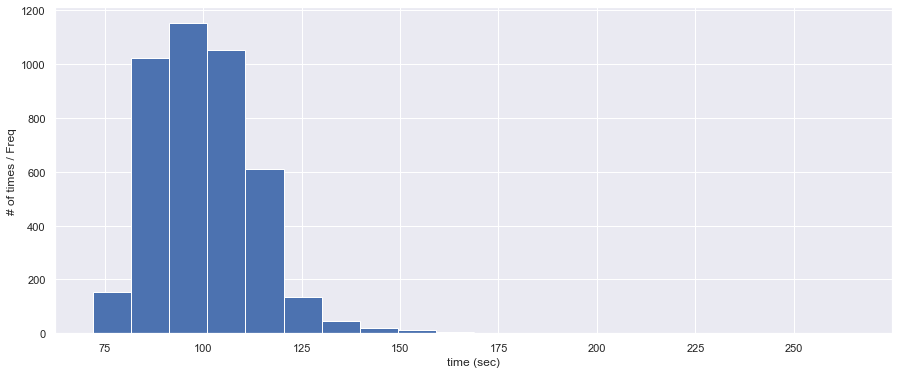

In [18]:
plt.figure(figsize=(15,6))
plt.hist(y,bins=20)
plt.ylabel('# of times / Freq')
plt.xlabel('time (sec)');

In [17]:
minimum = min(y)
maximum = max(y)
mean_val = y.mean()
std = y.std()

print(f' Min: {minimum} \n Max: {maximum} \n Mean: {mean_val} \n SD: {std}')

 Min: 72.11 
 Max: 265.32 
 Mean: 100.66931812782134 
 SD: 12.6778749695168


### Time series exploration - checking if things are changing over time/

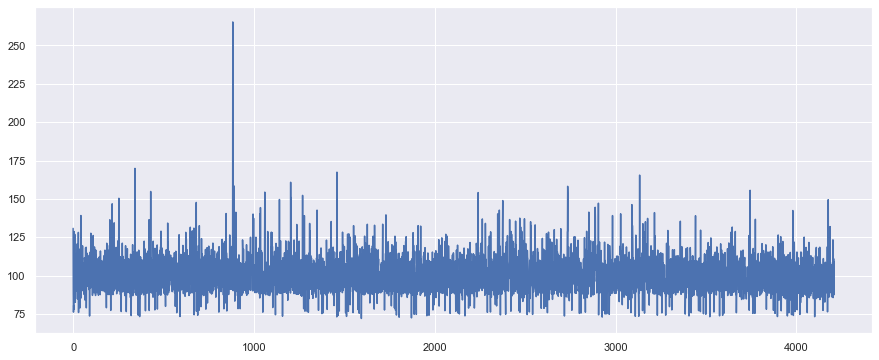

In [21]:
plt.figure(figsize=(15,6))
plt.plot(y);

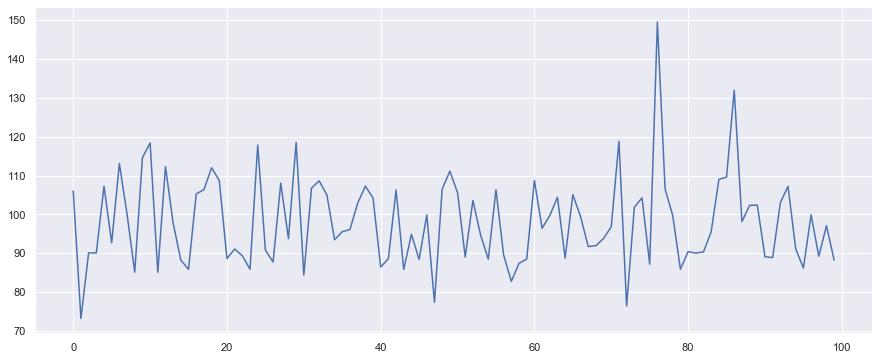

In [25]:
plt.figure(figsize=(15,6))
plt.plot(y[4100:4200]);

### Performing feature analysis

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [27]:
df.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [30]:
#float64(1), int64(369), object(8)

counts = [[],[],[]]

#cols = [c for c in df.columns if ]

cols = df.columns

for c in cols:
    uniq = len(np.unique(df[c]))
    if uniq==1:
        counts[0].append(c)
    elif uniq==2 and df[c].dtype== np.int64:
        counts[1].append(c)
    else:
        counts[2].append(c)

In [32]:
print(f' Constant Features: {len(counts[0])} \n Binary Features: {len(counts[1])} \n Categorical Features: {len(counts[2])}')

 Constant Features: 12 
 Binary Features: 356 
 Categorical Features: 10


In [34]:
counts[0]
df['X11']

0       0
1       0
2       0
3       0
4       0
       ..
4204    0
4205    0
4206    0
4207    0
4208    0
Name: X11, Length: 4209, dtype: int64

In [39]:
for c in counts[2]:
    val_cnt = df[c].value_counts()
    fig,ax= plt.subplots(figsize=(15,5))
    plt.bar(range(len(val_cnt)),val_cnt.values,color=palette[1])
    ax.set_xticks(range(len(val_cnt)))
    ax.set_xticklabels(val_cnt.index,rotation='vertical')

Error in callback <function flush_figures at 0x122530f80> (for post_execute):


KeyboardInterrupt: 

### XGBoost Implementation

In [40]:
dftst = pd.read_csv('/Users/vipulgaur/Downloads/test.csv')

In [57]:
#dftst.columns.values

In [42]:
coltst = list(set(df.columns)-set(['ID','y']))
#coltst

In [46]:
coltst = list(set(df.columns)-set(['ID','y']))


y_train = df['y'].values
id_tst = dftst['ID'].values
x_train = df[coltst]
x_test = dftst[coltst]

for col in coltst:
    cardinality = len(np.unique(x_train[col]))
    if cardinality==1:
        x_train.drop(col,axis=1)
        x_test.drop(col,axis=1)
    if cardinality>2:
        mapper=lambda x: sum([ord(d) for d in x]) #ord returns ascii val
        x_train[col] = x_train[col].apply(mapper)
        x_test[col] = x_test[col].apply(mapper)

/Users/vipulgaur/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/vipulgaur/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
x_train[['X0','X1','X2','X3','X4','X5','X6','X8']]

,X0,X1,X2,X3,X4,X5,X6,X8
0,107,118,213,97,100,117,106,111
1,107,116,215,101,100,121,108,111
2,219,119,110,99,100,120,106,120
3,219,116,110,102,100,120,108,101
4,219,118,110,102,100,104,100,110
...,...,...,...,...,...,...,...,...
4204,204,115,212,99,100,194,100,113
4205,106,111,116,100,100,194,104,104
4206,204,118,114,97,100,194,103,101
4207,205,114,101,102,100,194,108,117


In [55]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.15,random_state=42)

In [58]:
d_train=xgb.DMatrix(x_train,label=y_train)
d_valid=xgb.DMatrix(x_valid,label=y_valid)
d_test=xgb.DMatrix(x_test)

In [60]:
params={}
params['objective']='reg:linear'
params['eta']=0.02
params['max_depth']=4

def xgb_r2_score(preds,dtrain):
    labels = dtrain.get_label()
    return 'r2',r2_score(labels,preds)

watchlist = [(d_train,'train'),(d_valid,'valid')]

clf=xgb.train(params,d_train,1000,watchlist,early_stopping_rounds=50,feval=xgb_r2_score,maximize=True,verbose_eval=10)

[11:54:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.9988	valid-rmse:98.7763	train-r2:-59.0801	valid-r2:-65.3143
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.0613	valid-rmse:80.8167	train-r2:-39.2808	valid-r2:-43.3919
[20]	train-rmse:66.4339	valid-rmse:66.1631	train-r2:-26.0551	valid-r2:-28.7532
[30]	train-rmse:54.5185	valid-rmse:54.2172	train-r2:-17.2204	valid-r2:-18.9791
[40]	train-rmse:44.8282	valid-rmse:44.4907	train-r2:-11.3189	valid-r2:-12.4536
[50]	train-rmse:36.9655	valid-rmse:36.5905	train-r2:-7.37652	valid-r2:-8.09995
[60]	train-rmse:30.6066	valid-rmse:30.1894	train-r2:-4.74251	valid-r2:-5.19457
[70]	train-rmse:25.488	valid-rmse:25.023	train-r2:-2.98238	valid-r2:-3.25581
[80]	train-rmse:21.3944	valid-rmse:20.8794	train-r2:-1.8059	valid-r2:-1.96305
[90]	train-rmse:18.1479	valid-rmse:1

In [67]:
ptest = clf.predict(d_test)
pred = pd.DataFrame()
pred['ID']=id_tst
pred['predicted_y']=ptest
pred.head(30)

,ID,predicted_y
0,1,89.237732
1,2,103.157776
2,3,86.619102
3,4,77.130974
4,5,111.161095
5,8,92.674454
6,10,111.736572
7,11,93.989296
8,12,115.994980
9,14,94.623795
